<a href="https://colab.research.google.com/github/bountyhunter12/ML/blob/main/RidgeRegularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [28]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [29]:
x = data.data
y = data.target

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
from sklearn.metrics import r2_score,mean_squared_error
y_pre = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pre))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pre)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [33]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=0.0001)

In [34]:
r.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [35]:
y_p = r.predict(X_test)

In [36]:
print("R2 score",r2_score(y_test,y_p))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_p)))

R2 score 0.5189732635884949
RMSE 48.71893700181956


In [37]:
lr.intercept_

152.13623331746496

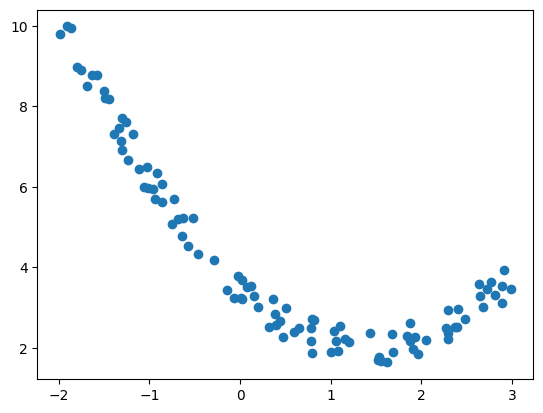

In [38]:
m = 100
x1 = 5 * np.random.rand(m, 1)-2
x2 = 0.7 * x1 ** 2 - 2 *x1 +3 +np.random.rand(m,1)

plt.scatter(x1, x2)
plt.show()

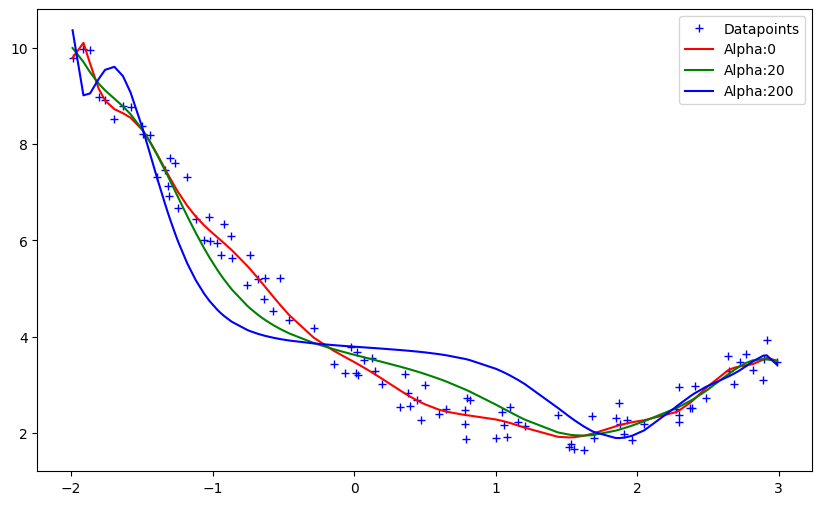

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
  model = Pipeline([
      ('poly_feats', PolynomialFeatures(degree=16)),
      ('ridge', Ridge(alpha = alpha))
  ])
  model.fit(x1, x2)
  return model.predict(x1)
alphas = [0, 20,200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label = 'Datapoints')

for alpha, c in zip(alphas, cs):
  preds = get_preds_ridge(x1, x2, alpha)

  plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha:{}'.format(alpha))

plt.legend()
plt.show()